<a href="https://colab.research.google.com/github/Vamshidhar666/IBM-AIML_Project/blob/main/Sentiment_Analysis_of_restauraunt_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment Analysis on Restaurant Reviews**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import csv

tsv_file_path = '/content/drive/MyDrive/Restaurant_Reviews (1).tsv'

# Open the TSV file for reading
with open(tsv_file_path, 'r', newline='') as tsvfile:
    # Create a CSV reader using a tab delimiter
    tsv_reader = csv.reader(tsvfile, delimiter='\t')

    # Iterate through each row in the TSV file
    for row in tsv_reader:
        # Each row is a list of values from the TSV file
        print(row)

['Review', 'Liked']
['Wow... Loved this place.', '1']
['Crust is not good.', '0']
['Not tasty and the texture was just nasty.', '0']
['Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.', '1']
['The selection on the menu was great and so were the prices.', '1']
['Now I am getting angry and I want my damn pho.', '0']
["Honeslty it didn't taste THAT fresh.)", '0']
['The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.', '0']
['The fries were great too.', '1']
['A great touch.', '1']
['Service was very prompt.', '1']
['Would not go back.', '0']
['The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.', '0']
['I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!', '1']
['I was disgusted because I was pretty sure that was human hair.', '0']
['I was shocked because no signs indicate cash only.', '0']
['Highly recommended.', '1']
['Waitress was a

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Restaurant_Reviews (1).tsv', delimiter='\t')

In [ ]:
data.shape

(1000, 2)

In [ ]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [ ]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus = []

for i in range(0, 1000):
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=data['Review'][i])
    review = review.lower()
    review_words = review.split()  # Split the review into words
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    review_words = [ps.stem(word) for word in review_words]
    review = ' '.join(review_words)  # Join the processed words back into a sentence
    corpus.append(review)

In [ ]:
corpus[:1500]


['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)


MultinomialNB()

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, log_loss, matthews_corrcoef
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print(acc)
print(rec)
print(pre)
print(f1)
print(auc)
print(mcc)

0.765
0.7864077669902912
0.7641509433962265
0.7751196172248804
0.7643379041137024
0.5293916146291116


Text(95.72222222222221, 0.5, 'actual values')

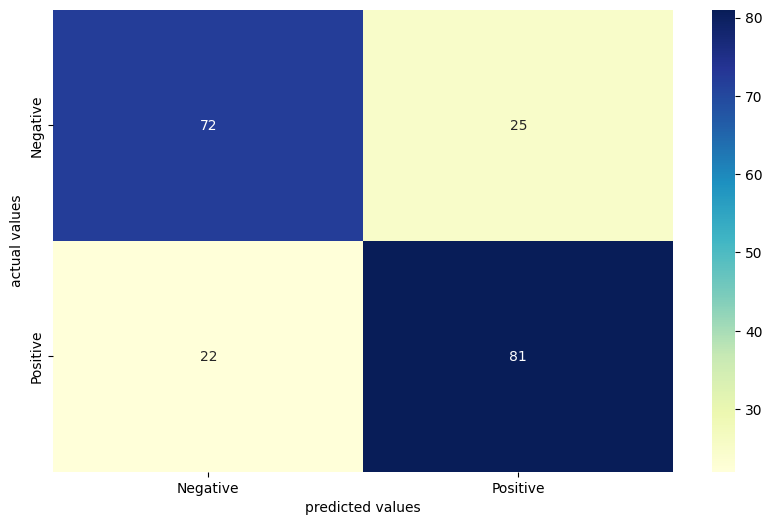

In [ ]:
# Compute specificity using confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
cm=confusion_matrix(y_test, y_pred)
                    # Compute ppv & npv using confusion matrix
ppv = tp / (tp + fp)
npv = tn / (tn + fn)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot= True, cmap="YlGnBu", xticklabels= ['Negative', 'Positive'], yticklabels = ['Negative', 'Positive'])
plt.xlabel("predicted values")
plt.ylabel("actual values")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

best_accuracy= 0.0
alpha_val =  0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred= temp_classifier.predict(X_test)
  score= accuracy_score(y_test, temp_y_pred)
  print(" Accuracy score for alpha = {} is:{}% ".format(round(i,1), round(val_accuracy*100,2)))
  if score>best_accuracy:
    best_accuracy= score
    alpha_val = i
print("................")
print(" the best accuracy is {}% with alpha value as {}".format(round(best_accuracy*100,2), round(alpha_val,1)))



 Accuracy score for alpha = 0.1 is:70.31% 
 Accuracy score for alpha = 0.2 is:70.31% 
 Accuracy score for alpha = 0.3 is:70.31% 
 Accuracy score for alpha = 0.4 is:70.31% 
 Accuracy score for alpha = 0.5 is:70.31% 
 Accuracy score for alpha = 0.6 is:70.31% 
 Accuracy score for alpha = 0.7 is:70.31% 
 Accuracy score for alpha = 0.8 is:70.31% 
 Accuracy score for alpha = 0.9 is:70.31% 
 Accuracy score for alpha = 1.0 is:70.31% 
................
 the best accuracy is 77.5% with alpha value as 0.1


In [ ]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join([final_review]).toarray()
  return classifier.predict(temp)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join([final_review]).toarray()
  return classifier.predict(temp)

sample_review = 'The food is really bad.'

if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review.')

TypeError: ignored

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords if not already present
nltk.download('stopwords')

# Assuming you have a classifier and necessary preprocessing defined elsewhere
# Replace this with your actual classifier and preprocessing steps
# Define the classifier and preprocessing steps

def preprocess_text(text):
    text = re.sub(pattern='[^a-zA-Z]', repl=' ', string=text)
    text = text.lower()
    text_words = text.split()
    text_words = [word for word in text_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_text = ' '.join([ps.stem(word) for word in text_words])
    return final_text

# Replace with your actual classifier
def predict_sentiment(text):
    # Assuming you have a classifier defined elsewhere
    # Replace this with your actual prediction using the classifier
    # For demonstration purposes, let's assume a simple rule for sentiment
    if 'bad' in text:
        return False  # Negative sentiment
    else:
        return True  # Positive sentiment

sample_review = 'The food is really bad.'

# Preprocess the review
preprocessed_review = preprocess_text(sample_review)

# Predict sentiment for the preprocessed review
if predict_sentiment(preprocessed_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review.')


This is a NEGATIVE review.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
sample_review = 'The food was pretty bad and the service was very slow.'
if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review.')

This is a NEGATIVE review.


In [ ]:
sample_review = 'The food was absolutley wonderful, from preparation on presentation, very pleasing.'
if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review.')

This is a POSITIVE review.
